In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
import scipy.stats as st
from functions import *
from graphics import *
from statistics_tests import *
import pandas as pd

df_final_demo = get_final_demo_df()

df_web_data_concat = get_web_data_df()

df_final_exp = get_final_exp_df()

df_all = get_df_all()

LIMPIEZA DE DATOS

In [96]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [97]:
df_all = outlier_slayer(df_all)

In [98]:
df_all.sort_values(by=["client_id", "visit_id", "date_time"], ascending=[True, True, False], inplace=True)

In [99]:
df_all["time_diff"] = abs(df_all.groupby(["client_id", "visit_id"])["date_time"].diff().shift(-1).fillna(pd.Timedelta(seconds=0)) ).dt.total_seconds()

In [100]:
df_inter = df_all.copy()
df_inter.drop_duplicates(subset=["visit_id", "process_step"], keep="last", inplace=True)

In [101]:
df_all["time_diff_cleaned"] = abs(df_inter.groupby(["client_id", "visit_id"])["date_time"].diff().shift(-1).fillna(pd.Timedelta(seconds=0)) ).dt.total_seconds()

In [102]:
df_all["repetition"] = df_all.duplicated(subset=["visit_id", "process_step"], keep="last").astype(int)          #0 = no, 1 = yes

In [103]:
df_all["last_step"] = df_all.groupby("visit_id")["process_step"].transform("max")

In [104]:
bins = [0, 25, 40, 60, 100]  # Ajusta los valores de los límites según las necesidades
labels = ['Young (0-25)', 'Young Adult (26-40)', 'Mature Adult (41-60)', 'Senior (60+)']

# Crear la nueva columna 'age_segment' con los tramos de edad
df_all['age_segment'] = pd.cut(df_all['clnt_age'], bins=bins, labels=labels, right=False)

In [105]:
df_all_no_duplicates = df_all.drop_duplicates(subset="client_id")

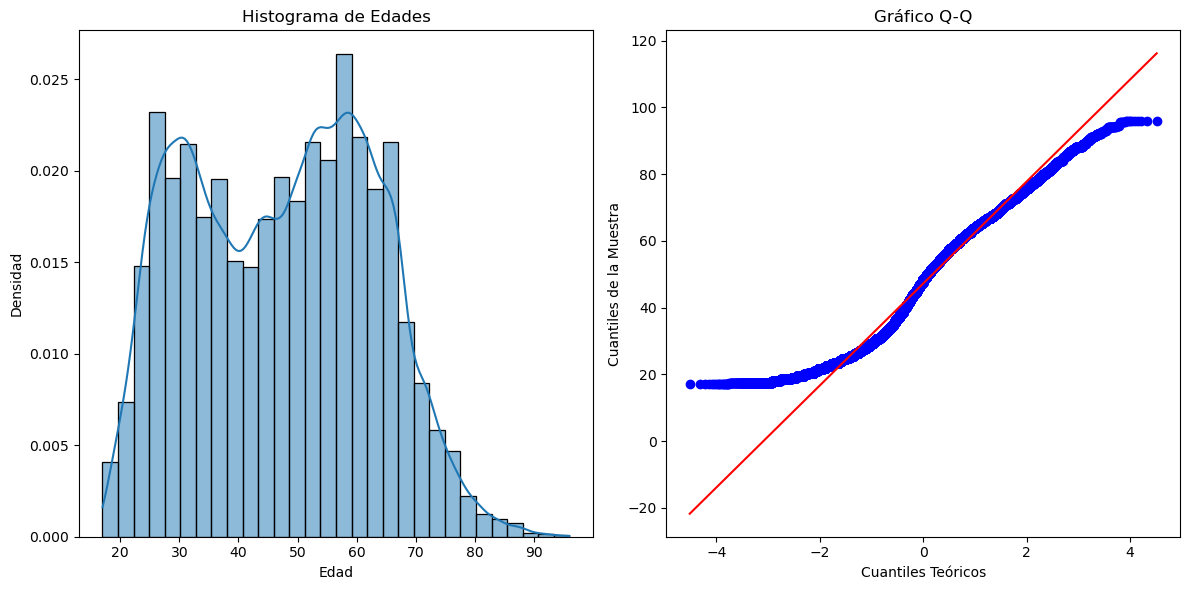

Estadística de Shapiro-Wilk: 0.9728003118043359
Valor p de Shapiro-Wilk: 3.221009866143631e-93
Se rechaza la hipótesis nula: los datos no son normalmente distribuidos.


c:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 220371.
  res = hypotest_fun_out(*samples, **kwds)


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 1. Histograma
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_all['clnt_age'], kde=True, stat='density', bins=30)
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# 2. Gráfico Q-Q
plt.subplot(1, 2, 2)
stats.probplot(df_all['clnt_age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')

plt.tight_layout()
plt.show()

# 3. Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(df_all['clnt_age'])
print('Estadística de Shapiro-Wilk:', shapiro_stat)
print('Valor p de Shapiro-Wilk:', shapiro_p)

# Interpretación
alpha = 0.05  # nivel de significancia
if shapiro_p > alpha:
    print("No se puede rechazar la hipótesis nula: los datos son normalmente distribuidos.")
else:
    print("Se rechaza la hipótesis nula: los datos no son normalmente distribuidos.")
